Sentiment Analysis on Movie Reviews

In [56]:
import pandas as pd

df = pd.read_csv('movie_reviews_sentiment_analysis.csv')

In [57]:
df.head()

,review,sentiment
0,A complete flop with no redeeming qualities.,negative
1,A masterpiece that I will watch again and again.,positive
2,The acting was terrible and the story was nons...,negative
3,What a great film! I would definitely recommen...,positive
4,I absolutely loved this movie! The plot was fa...,positive


In [58]:
df['sentiment'].value_counts()

sentiment
positive    513
negative    487
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [60]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/prashikbhimte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
df['cleaned_review'].head()

0        complete flop redeeming qualities
1                        masterpiece watch
2        acting terrible story nonsensical
3    great film would definitely recommend
4    absolutely loved movie plot fantastic
Name: cleaned_review, dtype: object

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()

y = df['sentiment'].map({'positive' : 1, 'negative' : 0})

In [63]:
X[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [64]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

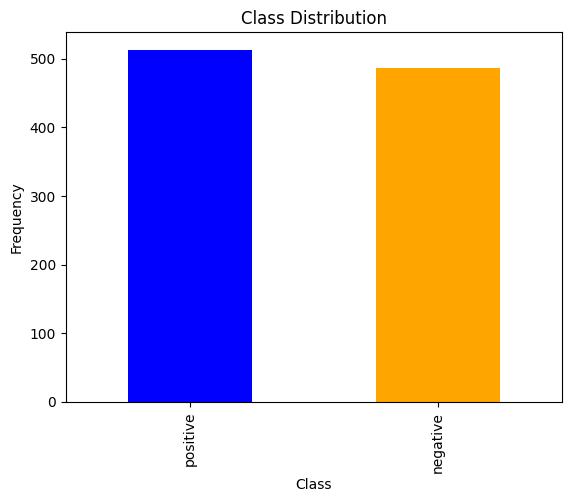

In [65]:
import matplotlib.pyplot as plt

class_distribution = df['sentiment'].value_counts()

class_distribution.plot(kind='bar', title='Class Distribution', color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes Classifiers

1. Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_gnb = gnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gnb))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


2. Multinomial Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [70]:
y_pred_mnb = mnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_mnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_mnb))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


3. Bernoulli Naive Bayes

In [71]:
from sklearn.naive_bayes import BernoulliNB

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [72]:
y_pred_bnb = bnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bnb)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_bnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_bnb))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


SVM (Support Vector Machine)

In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [74]:
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


1. Soft Vs Hard Margin SVM

In [75]:
soft_svm_model = SVC(kernel='linear', C=0.1)
soft_svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [76]:
y_pred_soft_svm = soft_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_soft_svm)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_soft_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_soft_svm))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


In [77]:
hard_svm_model = SVC(kernel='linear', C=1000)
hard_svm_model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [78]:
y_pred_hard_svm = hard_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_hard_svm)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_hard_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_hard_svm))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


2. Hinge Loss

In [79]:
import numpy as np
from sklearn.metrics import hinge_loss

y_pred_svm = np.where(y_pred_svm == 1, 1, -1)
hinge_loss_value = hinge_loss(y_test, y_pred_svm)

print(f'Hinge Loss: {hinge_loss_value:.4f}')

Hinge Loss: 0.0000


3. Kernelization (rbf vs ploy)

In [80]:
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train)

SVC()

In [81]:
y_pred_rbf_svm = hard_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rbf_svm)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rbf_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rbf_svm))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


In [82]:
svm_poly_model = SVC(kernel='poly')
svm_poly_model.fit(X_train, y_train)

SVC(kernel='poly')

In [83]:
y_pred_poly_svm = svm_poly_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_poly_svm)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_poly_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_poly_svm))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 94   0]
 [  0 106]]


Evaluating Models

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'GaussianNB'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'BernoulliNB'),
  Text(3, 0, 'Linear SVM'),
  Text(4, 0, 'RBF SVM'),
  Text(5, 0, 'Poly SVM')])

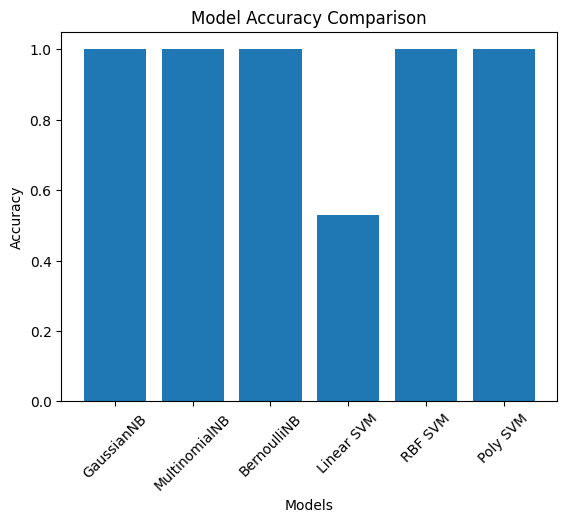

In [86]:
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'Linear SVM', 'RBF SVM', 'Poly SVM']
accuracies = [
    accuracy_score(y_test, y_pred_gnb),
    accuracy_score(y_test, y_pred_mnb),
    accuracy_score(y_test, y_pred_bnb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rbf_svm),
    accuracy_score(y_test, y_pred_poly_svm)
]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)